## Getting Started

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import dataset and name the columns
data = pd.read_csv('abalone2.csv', header=None)
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
             'VisceraWeight', 'ShellWeight', 'Rings']
data.head(10)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0
7,NaN,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16.0
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9.0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19.0


## Boolean Indexing

In [3]:
data.loc[(data['Height'] >= 0.10) & (data['Rings'] >= 10) & \
         (data['Sex'] == 'M'), ['Diameter', 'Length']].head()

,Diameter,Length
3,0.365,0.440
11,0.350,0.430
12,0.380,0.490
27,0.445,0.590
29,0.425,0.575


## The `apply` Function

In [4]:
#Create a new function
def num_missing(x):
    return sum(x.isnull())

Applying per column:

In [5]:
data.apply(num_missing, axis=0)

Sex              26
Length            5
Diameter          7
Height            7
WholeWeight       9
ShuckedWeight     6
VisceraWeight     6
ShellWeight       6
Rings             7
dtype: int64

Applying per row:

In [6]:
data.apply(num_missing, axis=1).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

## Pivot Tables

In [7]:
impute_grps = data.pivot_table(values=['Rings'], index=['Sex', 'Length',
                                                           'Height'], aggfunc=np.mean)
impute_grps.head(30)

Rings
Sex Length Height           
F   0.275  0.070    5.000000
    0.290  0.075    5.500000
    0.305  0.070    7.000000
           0.080    7.000000
    0.325  0.090    7.000000
    0.330  0.080    9.000000
    0.335  0.070    6.000000
    0.340  0.085    6.000000
    0.345  0.090    8.000000
           0.100    9.000000
    0.350  0.065   10.000000
           0.090    7.000000
    0.360  0.090    7.666667
    0.370  0.080    8.000000
           0.085    5.000000
           0.100    7.500000
           0.105    9.000000
           0.110   10.000000
           0.115    9.000000
    0.375  0.080    7.000000
           0.110    7.000000
           0.115   10.000000
           0.135    7.000000
    0.380  0.090    9.000000
           0.095    8.000000
           0.105   11.000000
           0.110   10.000000
           0.115    7.000000
    0.385  0.100    6.000000
           0.105    7.000000

## Multi-Indexing

In [8]:
#iterate only through rows with missing WholeWeight
for i, row in data.loc[data['WholeWeight'].isnull(), :].iterrows():
    ind = tuple([row['Sex'], row['Length'], row['Height']])
    data.loc[i, 'WholeWeight'] = impute_grps.loc[ind].values[0]

In [9]:
data.apply(num_missing, axis=0)

Sex              26
Length            5
Diameter          7
Height            7
WholeWeight       0
ShuckedWeight     6
VisceraWeight     6
ShellWeight       6
Rings             7
dtype: int64

## Crosstab

In [10]:
pd.crosstab(data['Sex'], data['Rings'], margins=True)

Rings,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,43,120,236,245,...,12,7,3,6,1,1,0,1,1,1294
I,1,1,12,51,100,214,264,273,173,92,...,2,1,0,0,0,0,0,0,0,1336
M,0,0,3,6,11,27,79,172,277,290,...,12,6,3,3,1,0,1,1,0,1514
All,1,1,15,57,115,257,386,565,686,627,...,26,14,6,9,2,1,1,2,1,4144


In [11]:
#Convert into percentages
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data['Sex'], data['Rings'], margins=True).apply(percConvert, axis=1)

Rings,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,0.000000,0.000000,0.000000,0.000000,0.003091,0.012365,0.033230,0.092736,0.182380,0.189335,...,0.009274,0.005410,0.002318,0.004637,0.000773,0.000773,0.000000,0.000773,0.000773,1.0
I,0.000749,0.000749,0.008982,0.038174,0.074850,0.160180,0.197605,0.204341,0.129491,0.068862,...,0.001497,0.000749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
M,0.000000,0.000000,0.001982,0.003963,0.007266,0.017834,0.052180,0.113606,0.182959,0.191546,...,0.007926,0.003963,0.001982,0.001982,0.000661,0.000000,0.000661,0.000661,0.000000,1.0
All,0.000241,0.000241,0.003620,0.013755,0.027751,0.062017,0.093147,0.136342,0.165541,0.151303,...,0.006274,0.003378,0.001448,0.002172,0.000483,0.000241,0.000241,0.000483,0.000241,1.0


Crosstabulation not very useful and intuitive in this case. Check <a href='https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/'>this</a> tutorial for a better example using the loan dataset.

## Merging

In [14]:
#Create a new age grouping dataframe
sexes = pd.DataFrame([1, 2, 3], index=['M', 'F', 'I'], columns=['sex_group'])
sexes

,sex_group
M,1
F,2
I,3


In [15]:
#Finally merge the dataframe and create pivot table
data_merged = data.merge(right=sexes, how='inner', left_on='Sex', right_index=True, sort=False)
data_merged.pivot_table(values='Rings', index=['Sex', 'sex_group'], aggfunc=len)

,,Rings
Sex,sex_group,
F,2,1296.0
I,3,1337.0
M,1,1518.0


## Sorting

In [16]:
data_sorted = data.sort_values(['Rings', 'Sex'], ascending=False)
data_sorted[['Rings', 'Sex']].head(10)

,Rings,Sex
480,29.0,F
2108,27.0,M
2209,27.0,F
294,26.0,M
2201,25.0,F
3280,24.0,M
3149,24.0,F
314,23.0,M
2335,23.0,M
2436,23.0,M


Note: Pandas `sort` function is deprecated. Use `sort_values` instead.

## Plotting

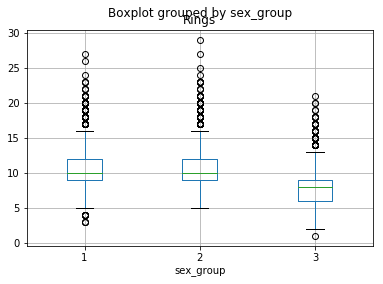

In [19]:
import matplotlib.pyplot as plt
data_merged.boxplot(column='Rings', by='sex_group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A765379E8>,
      dtype=object)

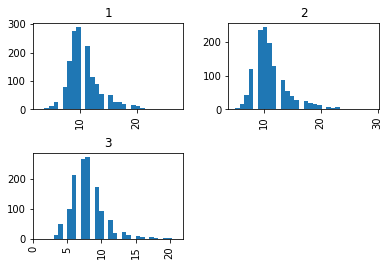

In [21]:
data_merged.hist(column='Rings', by='sex_group', bins=30)

## Binning

In [ ]:
"""Create the age column as a categorical attribute

df['Age'] = pd.cut(df['Rings'], bins=[0, 10, 20, float('Inf')],
                  labels=['young', 'adult', 'old'])
                  """

Longer way of doing the above:

In [22]:
def binning(col, cut_points, labels=None):
    #define mix and max values
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points) + 1)
        
    #binning using cut function of Pandas
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

In [23]:
#Binning age
cut_points = [0, 10, 20]
labels = ['young', 'adult', 'old']
data['Age_groups'] = binning(data['Rings'], cut_points, labels)
print(pd.value_counts(data['Age_groups'], sort=False))

Series([], Name: Age_groups, dtype: int64)


## Encoding Nomical Data

In [25]:
#Define generic function using Pandas replace function
def encoding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#Encoding Sex as M=1, F=2, I=3
print('Before encoding:')
print(pd.value_counts(data['Sex']))
data['Sex_Encoded'] = encoding(data['Sex'], {'M':1, 'F':2, 'I': 3})
print('After Encoding:')
print(pd.value_counts(data['Sex_Encoded']))

Before encoding:
M    1518
I    1337
F    1296
Name: Sex, dtype: int64
After Encoding:
1.0    1518
3.0    1337
2.0    1296
Name: Sex_Encoded, dtype: int64


## Iterating Over Rows

Isn't very useful with this dataset. Read <a href='https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/'>this</a> tutorial for more.